# No-Show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**

### In this notebook we will be asking multiple questions and answering them through visualizations
**Questions**
- What is the amount of show ups vs no show ?
- How many people showed up and didnt show up based on Gender?
- Did recieveing an SMS increase show up ?
- What neighbourhood has the most No show ?
- What age group has the most show ups ?

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [17]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
71390,5.129391e+13,5579892,F,2016-04-13T15:52:26Z,2016-05-03T00:00:00Z,68,TABUAZEIRO,0,1,0,0,0,1,No
51948,9.519553e+14,5729384,F,2016-05-24T07:28:17Z,2016-05-24T00:00:00Z,65,JESUS DE NAZARETH,1,1,0,1,0,0,No
33332,9.944935e+12,5601131,F,2016-04-19T12:05:51Z,2016-05-09T00:00:00Z,25,JOANA D´ARC,0,0,0,0,0,0,Yes
45137,9.194432e+12,5627952,F,2016-04-27T10:13:48Z,2016-05-19T00:00:00Z,56,SANTO ANTÔNIO,0,1,0,0,0,0,No
57402,3.265268e+12,5591872,M,2016-04-18T07:19:22Z,2016-05-19T00:00:00Z,7,MARIA ORTIZ,0,0,0,0,0,0,No


Fix columns typos

In [18]:
df.rename(columns={"Hipertension":'Hypertension','Handcap':"Handicap"}, inplace =True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [20]:
df.duplicated().sum()

0

As we can see from the info there is no null values in the dataset as well as no duplicated rows

We will turn the scheduled day and appointment day from string to datetime 
Adding a column to see the difference between the appointment day and scheduled day

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [22]:
df['Days untill ScheduledDay'] = df['AppointmentDay']-df['ScheduledDay']
df['Days untill ScheduledDay'] = df["Days untill ScheduledDay"] / np.timedelta64(1, 'D')
df['Days untill ScheduledDay'] = df['Days untill ScheduledDay'].astype(int)

In [23]:
bins= [-1,0,2,4,13,20, 110]
labels = ['unknown','Infant','Toddler','Kid','Teen', 'Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

we added age groups from infants all the way to adults to help us in categorizing ages

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days untill ScheduledDay,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Adult
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Kid
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Adult


In [25]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Days untill ScheduledDay
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.532648
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.027798
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


more info about every columns 

<a id='eda'></a>
## Exploratory Data Analysis



mask dataframe for people who showed up and people who didnt

In [26]:
noshow = df[df['No-show']=='Yes']
show = df[df['No-show']=='No']

### What is the precentage of gender in this dataset ? 

In [27]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

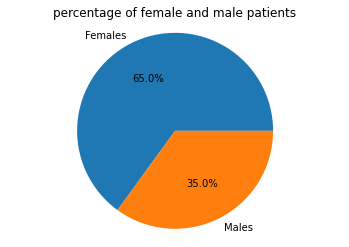

In [28]:

labels = ['Females','Males']
sizes = df['Gender'].value_counts()


tile, x = plt.subplots()
x.pie(sizes, labels=labels, autopct='%1.1f%%',
         )
x.axis('equal')  
x.set_title("percentage of female and male patients")
plt.show()

A pie chart that shows the percentages of genders

Used a pie chart for its simplicity when having 2 values


### What is the amount of show ups vs no show ? 

Calculating the count of no shows and shows through the mask dataframes

In [29]:
show['No-show'].count()

88208

In [30]:
noshow['No-show'].count()

22319

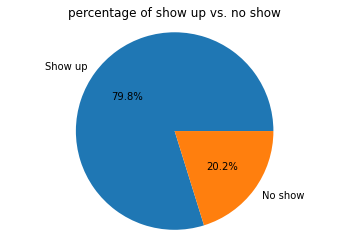

In [31]:

labels = ['Show up','No show']
sizes = [show['No-show'].count(),noshow['No-show'].count()]


tile, x = plt.subplots()
x.pie(sizes, labels=labels, autopct='%1.1f%%',
         )
x.axis('equal')  
x.set_title("percentage of show up vs. no show")
plt.show()

Combined the counts of the masks dataframes of no show ups and show up to a pie chart


The pie chart shows the different of how much no show up and show up are there in the dataset

### How many people showed up and didnt show up based on Gender?

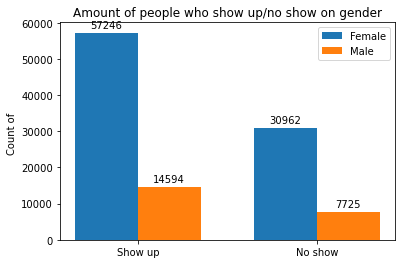

In [32]:
labels = ['Show up', 'No show']
gender_of_show = show['Gender'].value_counts()
gender_of_noshow = noshow['Gender'].value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gender_of_show, width, label='Female')
rects2 = ax.bar(x + width/2, gender_of_noshow, width, label='Male')
def autolabel(rects): #function for autlabeling the plot
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
ax.set_ylabel('Count of ')
ax.set_title('Amount of people who show up/no show on gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

we can see that the females show up more than the males
but also females don't show up more than males through a bar chart

### Did recieveing an SMS increase show up ?

group by sms_received to show how many people were sent an sms
and who didnt receive

In [33]:
didnt_recieve_sms = df.groupby(["SMS_received"])['No-show'].value_counts()[0]
recieved_sms = df.groupby(["SMS_received"])['No-show'].value_counts()[1]

The code for plotting a bar chart with subplots

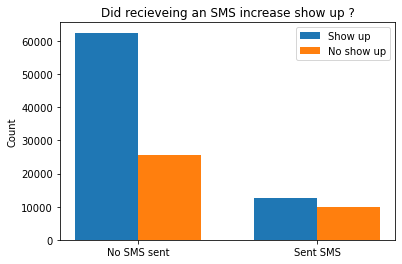

In [34]:
labels = ['No SMS sent', 'Sent SMS']
count_nosms = didnt_recieve_sms
count_recieved = recieved_sms

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_nosms, width, label='Show up')
rects2 = ax.bar(x + width/2, count_recieved, width, label='No show up')

ax.set_ylabel('Count')
ax.set_title('Did recieveing an SMS increase show up ?')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

The bar chart shows that people who didnt recieve an sms showed up alot more than the people who did

### What neighbourhood has the most No show ? 

using the mask dataset noshow which shows people who didnt show up to group by neighbourhood

And then see which neighbourhood had the most No show up 

In [35]:
neighb = noshow.groupby(["Neighbourhood"])['No-show'].count().sort_values()

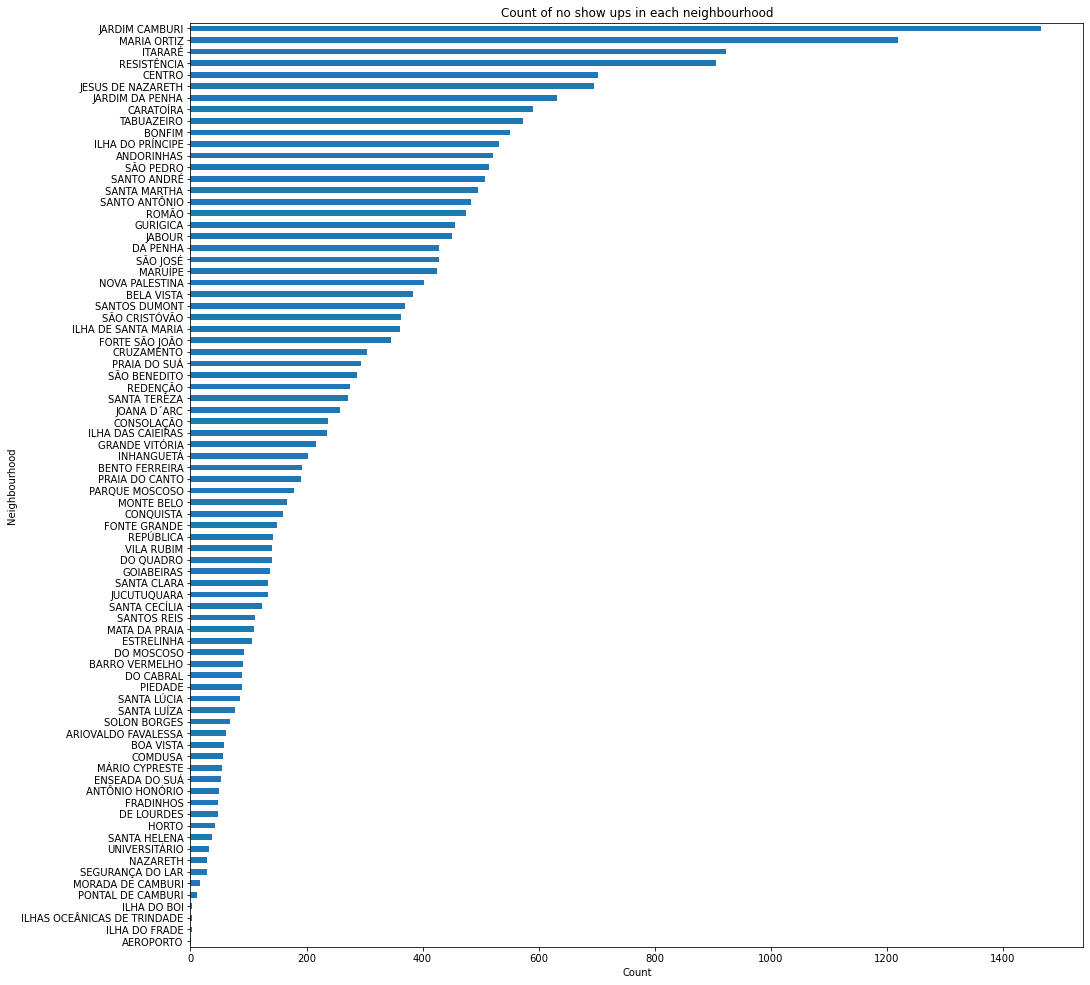

In [47]:
neighb.plot(kind="barh",figsize = (16,17) , title = "Count of no show ups in each neighbourhood",ylabel = "count",xlabel = "Neighbourhood");
plt.xlabel("Count");

From this horizontal bar chart we can see that jardi camburi is in the lead of neighbourhoods whose patients didnt show up

### What age group has the most show ups ? 

Grouping by the age group column in the show mask dataframe to see which age group showed up the most

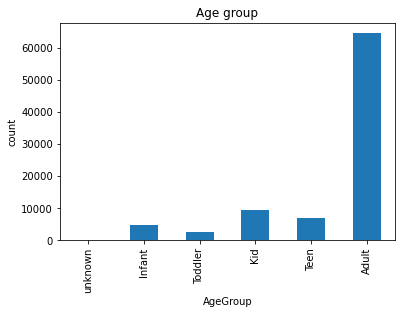

In [44]:
show.groupby(["AgeGroup"])['No-show'].count().plot(kind='bar',title = "Age group",ylabel = "count");

Adults are more likely to show up to their scheduled day

<a id='conclusions'></a>
## Conclusions
- The Female patients are more than the male patients
- 79.8% of patients in this dataset showed up to their scheduled day
- The sending of a reminder SMS didn't really increase the number of people who showed up
- The female gender showed up more than the male gender
- Jardim camburi neighbourhood had the most amount of show ups
- Age Group with the most show ups are adults

## Limitations
- This dataset is for 3 months of 2016 only, If there were more than 3 months or one whole year it could have helped with better analysis
- even though they had more no show ups,We have no information if the sent SMS was read and opened or not
